In [1]:
from wgan import WGAN
from load_dataset import parser
import tensorflow as tf
from tensorflow import keras

2022-09-20 14:31:51.487857: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 14:31:51.779268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-20 14:31:51.779284: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-20 14:31:51.815574: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-20 14:31:52.865670: W tensorflow/stream_executor/platform/de

In [2]:
# Creating GAN
wgan = WGAN()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1216      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 global_max_pooling2d (Globa  (None, 128)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                        

2022-09-20 14:31:54.812100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-20 14:31:54.812135: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-20 14:31:54.812156: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gaspard-HP-ZBook-15u-G2): /proc/driver/nvidia/version does not exist
2022-09-20 14:31:54.812397: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 layer_normalization (LayerN  (None, 128)              256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 layer_normalization_1 (Laye  (None, 512)              1024      
 rNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1024)              525312    
                                                                 
 layer_normalization_2 (Laye  (None, 1024)            

In [3]:
# Importing the dataset
tfile = "/home/gaspard/ETHZ/Master_Arbeit/acoupipe_datasets/training_1-100000_csmtriu_1src_he4.0625-1393.4375Hz_ds1-v001_13-Sep-2022.tfrecord"
dataset = tf.data.TFRecordDataset(filenames=[tfile])

# The parser convert the CSMTRIU into eigenvector (TODO: need to be extended to also extract the eigenvalues.)
dataset = dataset.map(parser)

#  Creating the batches
dataset = dataset.shuffle(buffer_size=10).batch(wgan.batch_size)


In [4]:
# Training the GAN
wgan.train(n_epoch=100, data=dataset)

Epoch 0: [C_loss: -0.0] [G_loss: -0.156]
Epoch 1: [C_loss: 0.001] [G_loss: -0.161]
Epoch 2: [C_loss: 0.001] [G_loss: -0.172]
Epoch 3: [C_loss: 0.002] [G_loss: -0.167]
Epoch 4: [C_loss: 0.001] [G_loss: -0.156]
Epoch 5: [C_loss: 0.001] [G_loss: -0.172]
Epoch 6: [C_loss: 0.001] [G_loss: -0.179]
Epoch 7: [C_loss: 0.001] [G_loss: -0.179]
Epoch 8: [C_loss: 0.0] [G_loss: -0.177]
Epoch 9: [C_loss: 0.001] [G_loss: -0.186]
Epoch 10: [C_loss: 0.002] [G_loss: -0.181]
Epoch 11: [C_loss: 0.002] [G_loss: -0.186]
Epoch 12: [C_loss: 0.001] [G_loss: -0.185]
Epoch 13: [C_loss: 0.002] [G_loss: -0.195]
Epoch 14: [C_loss: 0.001] [G_loss: -0.196]
Epoch 15: [C_loss: 0.001] [G_loss: -0.193]
Epoch 16: [C_loss: 0.001] [G_loss: -0.197]
Epoch 17: [C_loss: 0.0] [G_loss: -0.207]
Epoch 18: [C_loss: 0.001] [G_loss: -0.202]
Epoch 19: [C_loss: 0.003] [G_loss: -0.212]
Epoch 20: [C_loss: -0.0] [G_loss: -0.193]
Epoch 21: [C_loss: 0.003] [G_loss: -0.222]
Epoch 22: [C_loss: 0.001] [G_loss: -0.216]
Epoch 23: [C_loss: 0.001] [

{'g_loss': <tf.Tensor: shape=(), dtype=float32, numpy=-0.13796917>,
 'c_loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.0005776014>}

1/1 [==============================] - 0s 42ms/step
tf.Tensor(0.070243165, shape=(), dtype=float32)
real sample found
(1, 1)


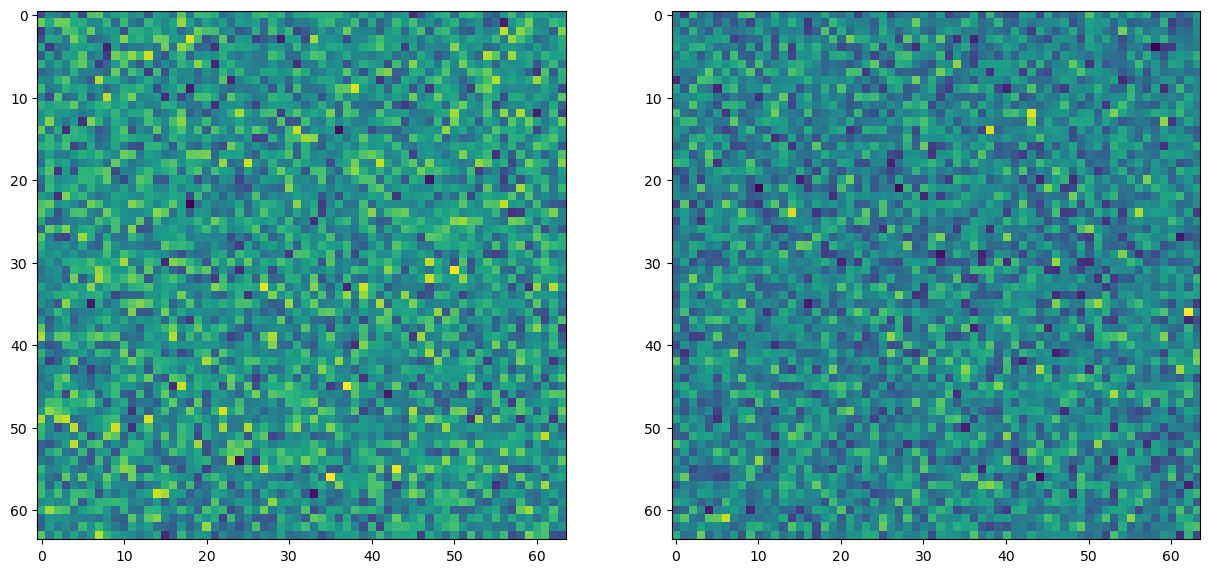

In [6]:
import matplotlib.pyplot as plt

# Generating a sample:
generated_eigenvector = wgan.get_sample()

if generated_eigenvector != None:
    real = generated_eigenvector[0,:,:,0]
    im = generated_eigenvector[0,:,:,1]

    fig = plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(real)
    plt.subplot(1,2,2)
    plt.imshow(im)
